In [74]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder

In [75]:
def plot_hist(df, column):
    df[column].plot.hist(title=f'Histogram of {column}', xlabel='Value', ylabel='Frequency')
    plt.show()
    print("Min:", np.min(df[column]), "Max:", np.max(df[column]))

def plot_hist_with_min_max(df, column, val_min, val_max):
    

    # Filter the DataFrame based on the minimum and maximum values
    df = df[(df[column] >= val_min) & (df[column] <= val_max)]
    
    df[column].plot.hist(title=f'Histogram of {column}', xlabel='Value', ylabel='Frequency')
    plt.show()
    print("Min:", np.min(df[column]), "Max:", np.max(df[column]))
    
def corr_matrix_with_threshold(df, threshold, title_str = "Filtered Correlation Matrix (Half Square)"):
    # Add target column to the DataFrame
    corr_matrix = df.corr()
    # Filter the correlation matrix based on the threshold
    filtered_matrix = corr_matrix[corr_matrix.abs() > threshold]
    mask = np.triu(np.ones_like(filtered_matrix, dtype=bool))
    
    plt.figure(figsize=(20, 12))
    sns.heatmap(filtered_matrix, annot=True, fmt=".2f", mask=mask, cmap="coolwarm")
    plt.title(title_str)
    plt.show()

    

In [76]:
# load data
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_test_partial_answer = pd.read_csv('test_partial_answer.csv')

In [77]:
print(df_train.columns)
print(df_test.columns)
print(df_test_partial_answer.columns)

Index(['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Views', 'Likes', 'Stream', 'Album_type', 'Licensed',
       'official_video', 'id', 'Track', 'Album', 'Uri', 'Url_spotify',
       'Url_youtube', 'Comments', 'Description', 'Title', 'Channel',
       'Composer', 'Artist'],
      dtype='object')
Index(['Energy', 'Key', 'Loudness', 'Speechiness', 'Acousticness',
       'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration_ms',
       'Views', 'Likes', 'Stream', 'Album_type', 'Licensed', 'official_video',
       'id', 'Track', 'Album', 'Uri', 'Url_spotify', 'Url_youtube', 'Comments',
       'Description', 'Title', 'Channel', 'Composer', 'Artist'],
      dtype='object')
Index(['id', 'Danceability'], dtype='object')


In [78]:
print(df_train.shape)
print(df_test.shape)
print(df_test_partial_answer.shape)


(17170, 29)
(6315, 28)
(631, 2)


In [79]:
def display_data(df, idx):
    print(df.loc[idx])
    print(df.loc[idx]['Url_spotify'])
    print(df.loc[idx]['Url_youtube'])
    print("--------------")


In [80]:
display_data(df_train, 81)
display_data(df_train, 84)
display_data(df_train, 104)

Danceability                                                      6.0
Energy                                                       0.371695
Key                                                               6.0
Loudness                                                      -12.734
Speechiness                                                     0.048
Acousticness                                                 0.103823
Instrumentalness                                              0.00121
Liveness                                                     0.085184
Valence                                                         0.972
Tempo                                                             NaN
Duration_ms                                                  220733.0
Views                                                     418957377.0
Likes                                                       3435429.0
Stream                                                    262132318.0
Album_type          

In [81]:
df_test_partial_answer.tail(5)

,id,Danceability
626,23462,4.0
627,23463,7.0
628,23473,5.0
629,23482,3.0
630,23484,2.0


<Axes: title={'center': 'Distribution of Danceability in the test set'}>

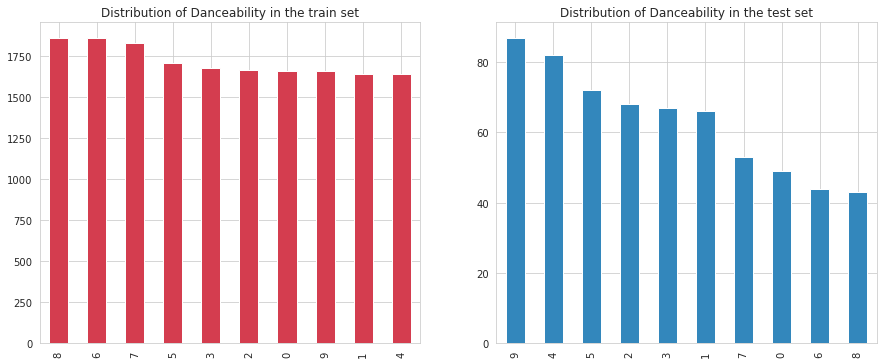

In [82]:
#check distribution test partial answer
from matplotlib import cm
df_test_partial_answer.Danceability = df_test_partial_answer.Danceability.astype('int8')
df_train.Danceability = df_train.Danceability.astype('int8')
#make style prettier
sns.set_style('whitegrid')
#plot distribution test partial answer
#each category with a different color
# cmap = cm.get_cmap('Spectral')
# df_test_partial_answer.Danceability.value_counts().plot(kind='bar', title='Distribution of Danceability in the test set')


#make plot bigger
plt.figure(figsize=(15, 13))

#plor Danceability in the train set side by side with the test set
plt.subplot(2, 2, 1)
df_train.Danceability.value_counts().plot(kind='bar', title='Distribution of Danceability in the train set', color=cmap(0.1))

plt.subplot(2, 2, 2)
df_test_partial_answer.Danceability.value_counts().plot(kind='bar', title='Distribution of Danceability in the test set', color=cmap(0.9))




In [83]:
df_all = pd.concat([df_train, df_test]).reset_index(drop=True)

arr_index_label_partial_answer = df_test_partial_answer['id'].values
arr_value_label_partial_answer = df_test_partial_answer['Danceability'].values
i = 0
for idx in arr_index_label_partial_answer:
    df_all.loc[idx,'Danceability'] = arr_value_label_partial_answer[i]
    i +=1
    
df_validation = df_all.loc[arr_index_label_partial_answer]    

print(df_validation.loc[23482])
print(df_validation.loc[23482]['Url_spotify'])
print(df_validation.loc[23482]['Url_youtube'])
df_validation.tail(5)

Danceability                                                      3.0
Energy                                                       0.426223
Key                                                               5.0
Loudness                                                    -5.807545
Speechiness                                                  0.072906
Acousticness                                                 0.661708
Instrumentalness                                             0.898308
Liveness                                                     0.000662
Valence                                                      0.087281
Tempo                                                       87.969239
Duration_ms                                              185842.04775
Views                                                 -3451739.821017
Likes                                                    23051.629825
Stream                                                18490943.259002
Album_type          

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,...,Album,Uri,Url_spotify,Url_youtube,Comments,Description,Title,Channel,Composer,Artist
23462,4.0,0.307725,7.0,-2.533880,0.033415,NaN,0.013672,0.001309,0.770259,95.871722,...,Alphagene II,spotify:track:04sN26COy28wTXYj3dMoiZ,https://open.spotify.com/artist/6twIAGnYuIT1pn...,NaN,6036.0,Simone Lamsma (violin) - Davida Scheffers (cor...,"Sigala, Paloma Faith - Lullaby",David Bowie - Topic,Finneas O'Connell,NaN
23463,7.0,0.269900,0.0,-11.299350,0.104984,0.006946,0.001588,0.001355,0.466107,103.858359,...,NaN,spotify:track:072YgF7J2clpY8DsWOpEri,https://open.spotify.com/artist/7hJcb9fa4alzcO...,NaN,940.0,"The official video of ""Ride Out"" by Kid Ink, T...",Cássia Eller - O Segundo Sol,BryantMyersVEVO,Mike Dean,Kurt Vile
23473,5.0,0.480568,8.0,-3.828332,NaN,0.153384,0.001714,0.000114,0.287141,91.755727,...,In A Time Lapse,spotify:track:2Y90nL1ohB4sgYELDs7uNx,https://open.spotify.com/artist/5JZ7CnR6gTvEMK...,https://www.youtube.com/watch?v=NIdWvUuEBB0,202.0,'Blank Space' taken from the I Prevail EP 'Hea...,SIDO - Medizin (feat. Jamule) [prod. Beatgees ...,AnaGabrielArgentina,Finneas O'Connell,Ed Sheeran
23482,3.0,0.426223,5.0,-5.807545,0.072906,0.661708,0.898308,0.000662,0.087281,87.969239,...,Young Right Now,spotify:track:6mz1fBdKATx6qP4oP1I65G,https://open.spotify.com/artist/4V8Sr092TqfHkf...,https://www.youtube.com/watch?v=ru3gH27Fn6E,NaN,"Die Ärzte; offizielles Video zu ""Deine Schuld""...",Sleepy Hallow - Breaking Bad (Okay) ft. Sheff ...,Kappa Originals,"Noah ""40"" Shebib","Tyler, The Creator"
23484,2.0,0.014679,NaN,NaN,0.082686,0.076426,0.214188,0.001583,0.735073,98.873933,...,NaN,spotify:track:5ln5yQdUywVbf8HhFsOcd6,NaN,https://www.youtube.com/watch?v=yxukv0gAhgY,11.0,NaN,Nas - The World Is Yours (Official HD Video),ChristmasTimeTV,Juicy J,J. Cole


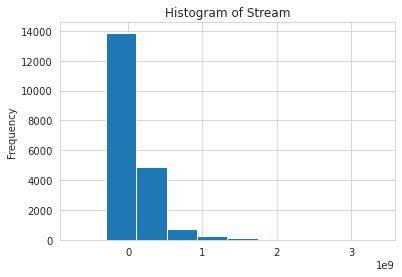

Min: -713372498.9844733 Max: 3386520288.0


In [84]:
plot_hist(df_all, 'Stream')

* Training: 17170
* Test: 6315
* Validation: 631

NB: 631 Validation is 10% from the Test (6315)

In [85]:
df_train.dtypes

Danceability           int8
Energy              float64
Key                 float64
Loudness            float64
Speechiness         float64
Acousticness        float64
Instrumentalness    float64
Liveness            float64
Valence             float64
Tempo               float64
Duration_ms         float64
Views               float64
Likes               float64
Stream              float64
Album_type           object
Licensed             object
official_video       object
id                    int64
Track                object
Album                object
Uri                  object
Url_spotify          object
Url_youtube          object
Comments            float64
Description          object
Title                object
Channel              object
Composer             object
Artist               object
dtype: object

In [86]:
def create_dictionary(keys):
    dictionary = {}
    for key in keys:
        dictionary[key] = None  
    return dictionary


def data_process_keep_only_numerical(input_data):
    numeric_columns = input_data.select_dtypes(include=['int64', 'float64'])
    return numeric_columns

def word_dictionary(arr_columns, input_train, input_test):
    # Append the two DataFrames
    appended_df = pd.concat([input_train, input_test])
    appended_df.reset_index(drop=True, inplace=True)
    arr_word_dict = {}
    for col in arr_columns:
        uniq_tmp = appended_df[col].unique()
        arr_dict = {value: value if isinstance(value, (int, float)) and np.isnan(value) else index for index, value in enumerate(uniq_tmp)}
        arr_word_dict[col] = arr_dict
    return arr_word_dict

word_dict = word_dictionary([
    'Album_type', 'Licensed', 'official_video', 'Track', 'Album', 'Uri', 'Url_spotify', 'Url_youtube', 
    'Description', 'Title', 'Channel', 'Composer', 'Artist'], df_train, df_test)

# Using Dictionary:
#   Album_type, Licensed, official_video, Composer, Channel, Artist
# Can be removed:
#   Uri, Url_spotify, Url_youtube
# Cannot use word_dict:
#   Track, Album, Description, Title
# ret_train.head()
# ret_test.head()

In [87]:
word_dict['Album_type']

{'album': 0, nan: nan, 'single': 2, 'compilation': 3}

In [88]:
df_train.head(4)

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,...,Album,Uri,Url_spotify,Url_youtube,Comments,Description,Title,Channel,Composer,Artist
0,0,0.000273,3.0,-25.176,0.0443,0.724151,0.000062,0.000807,0.340,83.398,...,Sinkovsky Plays and Sings Vivaldi,spotify:track:7njAZhca4o80qQdCgyEWya,https://open.spotify.com/artist/2QOIawHpSlOwXD...,https://www.youtube.com/watch?v=NzCL9uLkQSI,3070.0,Antonio Vivaldi's 4th Concerto - From his Most...,"Antonio Vivaldi - Concerto No.4 in F minor, Op...",Mozafunkula,NaN,Marshmello
1,0,0.184220,7.0,NaN,NaN,0.672221,0.910000,0.034966,0.746,148.692,...,NaN,spotify:track:2nnXe7n3Vivs7OfQKRsfWD,https://open.spotify.com/artist/2QOIawHpSlOwXD...,https://www.youtube.com/watch?v=jAnzlpPuIDU,122.0,"A. Vivaldi Concerto No. 2 in G minor, RV 315, ...","A. Vivaldi Concerto No. 2 in G minor, RV 315, ...",Anton Paisov,Finneas O'Connell,Bon Iver
2,0,NaN,6.0,-15.596,NaN,0.667628,0.867000,0.001772,0.380,84.899,...,Vivaldi: The Four Seasons,spotify:track:0VQMAup2VdeQWLCvM14Uz2,https://open.spotify.com/artist/2QOIawHpSlOwXD...,https://www.youtube.com/watch?v=jAnzlpPuIDU,122.0,"A. Vivaldi Concerto No. 2 in G minor, RV 315, ...",NaN,Anton Paisov,Finneas O'Connell,Kamasi Washington
3,1,0.209585,NaN,-6.251,0.0277,0.003796,NaN,0.001000,NaN,150.220,...,Life Thru A Lens,spotify:track:1M2nd8jNUkkwrc1dgBPTJz,https://open.spotify.com/artist/2HcwFjNelS49kF...,https://www.youtube.com/watch?v=luwAMFcc2f8,24350.0,25 years of Life Thru A Lens. Pre-order the br...,Robbie Williams - Angels,robbiewilliamsvevo,Louis Bell,Drake


In [89]:
def data_convert(file_type, df, word_dict):
    file_cache = 'cache_embedding/' + file_type + "_" + '_'.join(word_dict) + ".csv"
    print(file_cache)
    if os.path.exists(file_cache):
        print("---- Exist ----")
        df_ret = pd.read_csv(file_cache)
#         print(df_ret)
        return df_ret
    else:
        print("---- Not Cached ----")
        df_ret = df.copy()
        for dic in word_dict:
            print(dic)
            for key_dic in word_dict[dic]:
                df_ret.loc[df_ret[dic] == key_dic, dic] = word_dict[dic][key_dic]
        df_ret.to_csv(file_cache, index=False)
        return df_ret     

In [90]:
df_train_embedding = data_convert('train', df_train, word_dict)

cache_embedding/train_Album_type_Licensed_official_video_Track_Album_Uri_Url_spotify_Url_youtube_Description_Title_Channel_Composer_Artist.csv
---- Exist ----


In [91]:
df_test_embedding = data_convert('test', df_test, word_dict)

cache_embedding/test_Album_type_Licensed_official_video_Track_Album_Uri_Url_spotify_Url_youtube_Description_Title_Channel_Composer_Artist.csv
---- Exist ----


In [92]:
df_test_embedding

,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,...,Album,Uri,Url_spotify,Url_youtube,Comments,Description,Title,Channel,Composer,Artist
0,0.350403,6.0,-6.679000,0.177000,5.842771e-07,0.002330,0.230346,NaN,138.559000,222640.000000,...,9175.0,13586.0,1824.0,13363.0,169907.0,13034.0,13281.0,1207.0,3.0,42.0
1,0.347429,8.0,-5.815000,0.030200,NaN,0.000687,0.000099,0.852000,92.761000,200173.000000,...,NaN,NaN,1824.0,13364.0,31003.0,13035.0,13282.0,1207.0,1.0,NaN
2,0.786330,1.0,-3.930000,0.052200,7.676563e-05,NaN,0.001561,0.551000,108.014000,215150.000000,...,5886.0,NaN,1824.0,8383.0,7399.0,8114.0,8278.0,1207.0,1.0,68.0
3,0.403583,2.0,-5.810000,0.026000,3.442951e-15,0.509000,0.000262,0.578000,120.423000,233867.000000,...,9176.0,NaN,1824.0,NaN,55229.0,13036.0,NaN,1207.0,5.0,36.0
4,0.334255,NaN,-8.627000,0.171000,1.619428e-05,0.000000,0.000340,0.525000,167.953000,340920.000000,...,9177.0,NaN,NaN,NaN,155930.0,13037.0,NaN,1207.0,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6310,0.160377,7.0,-6.366894,0.045451,3.176921e-01,0.006016,0.001642,0.160253,72.136829,233721.956648,...,4855.0,12832.0,209.0,4346.0,168.0,6395.0,975.0,2970.0,6.0,NaN
6311,0.318585,10.0,-4.148566,0.073000,7.419596e-03,0.000817,0.008843,0.614366,NaN,138726.388393,...,3215.0,12281.0,1631.0,NaN,448.0,15033.0,4154.0,4731.0,7.0,NaN
6312,0.426223,5.0,-5.807545,0.072906,6.617082e-01,0.898308,0.000662,0.087281,87.969239,185842.047750,...,6738.0,2312.0,1937.0,4729.0,NaN,15034.0,12420.0,5845.0,4.0,23.0
6313,0.204440,NaN,-11.563964,0.037676,3.630868e-03,0.491785,0.030605,0.482987,NaN,180639.352865,...,7696.0,7213.0,1689.0,14885.0,15139.0,12253.0,1162.0,197.0,7.0,1.0


In [93]:
obj_columns = df_train_embedding.select_dtypes(include=['object']).columns
# print(int_columns)
# convert integer columns to float
df_train_embedding[obj_columns] = df_train_embedding[obj_columns].astype(np.float64)

In [94]:
obj_columns = df_test_embedding.select_dtypes(include=['object']).columns
# print(int_columns)
# convert integer columns to float
df_test_embedding[obj_columns] = df_test_embedding[obj_columns].astype(np.float64)

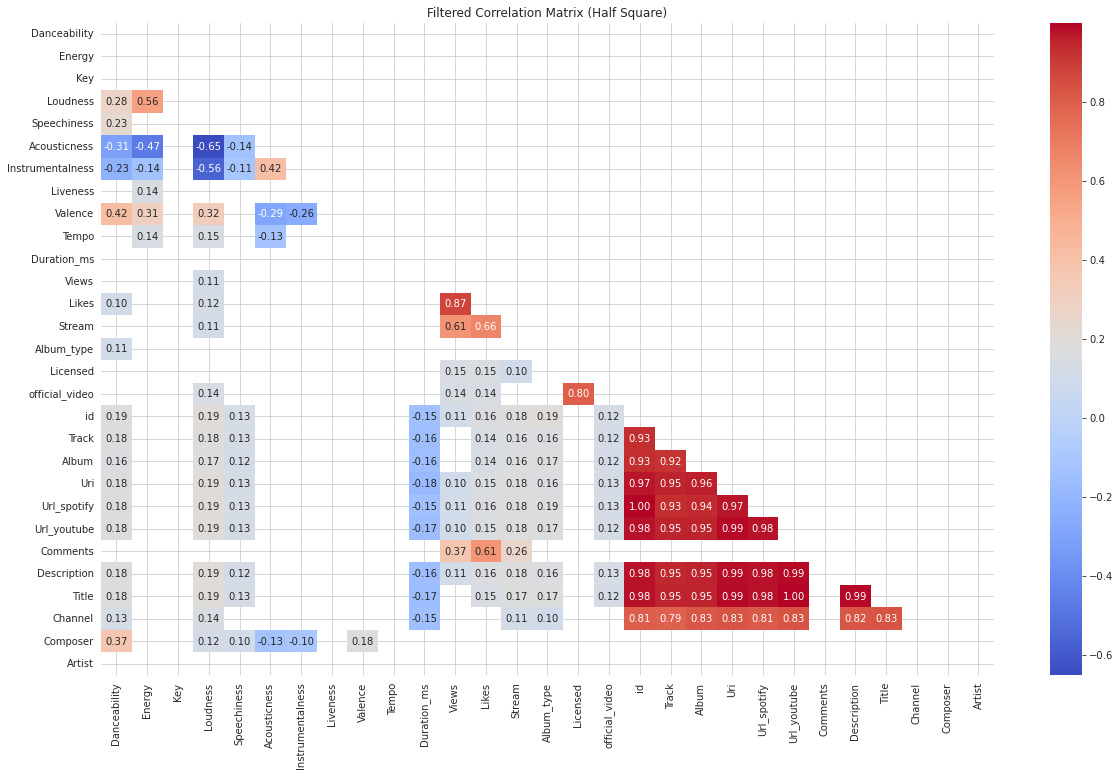

In [95]:
corr_matrix_with_threshold(df_train_embedding, 0.1) # render prettier

In [96]:
def keep_important_column(df, arr_column, is_test= False):
    df_copy = df.copy()
    if is_test:
        arr_column.remove('Danceability')
    return df_copy[arr_column]

def remove_unimportant_column(df, arr_column):
    df_dropped = df.drop(arr_column, axis=1)
    return df_dropped

In [97]:
arr_IMPORTANT = [  'Danceability', 'Liveness', 'Energy', 'Valence', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Composer', 'Tempo', 'Key', 'Views', 'Likes', 'Stream', 'Album_type']
# arr_IMPORTANT = [  'Danceability', 'Liveness', 'Energy', 'Valence', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Composer', 'Tempo', 'Key', 'Views', 'Likes', 'Stream', 'Album_type', 'Channel']
# arr_IMPORTANT = [  'Danceability', 'Liveness', 'Energy', 'Valence', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness']
# arr_IMPORTANT = [  'Danceability', 'Liveness', 'Energy', 'Valence', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Duration_ms', 'Tempo']
# arr_IMPORTANT = [  'Danceability', 'Liveness', 'Key', 'Views', 'Likes', 'Stream', 'Album_type', 'Licensed', 'official_video', 'Track', 'Album', 'Url_spotify', 'Energy', 'Valence', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Duration_ms', 'Tempo', 'Channel']
df_train_embedding_important = keep_important_column(df_train_embedding, arr_IMPORTANT, False)
df_test_embedding_important = keep_important_column(df_test_embedding, arr_IMPORTANT, True)

In [98]:
df_train_embedding_important

,Danceability,Liveness,Energy,Valence,Loudness,Speechiness,Acousticness,Instrumentalness,Composer,Tempo,Key,Views,Likes,Stream,Album_type
0,0.0,0.000807,0.000273,0.3400,-25.176,0.0443,7.241508e-01,0.000062,NaN,83.398,3.0,NaN,137622.0,19981370.0,0.0
1,0.0,0.034966,0.184220,0.7460,NaN,NaN,6.722214e-01,0.910000,1.0,148.692,7.0,184825.0,5190.0,NaN,NaN
2,0.0,0.001772,NaN,0.3800,-15.596,NaN,6.676276e-01,0.867000,1.0,84.899,6.0,184825.0,5190.0,19320810.0,NaN
3,1.0,0.001000,0.209585,NaN,-6.251,0.0277,3.796416e-03,NaN,2.0,150.220,NaN,202457327.0,997035.0,399661898.0,0.0
4,4.0,0.002924,NaN,0.2950,NaN,0.0260,3.048625e-06,0.000467,3.0,97.997,5.0,316688049.0,1299086.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17165,3.0,0.000591,0.794023,0.6580,-6.344,0.0328,8.991539e-02,0.000000,1.0,90.002,5.0,NaN,1113.0,NaN,NaN
17166,2.0,0.000786,0.820026,0.6570,-1.786,NaN,2.195200e-05,0.000000,3.0,174.869,4.0,164741.0,2019.0,10898176.0,2.0
17167,1.0,0.003652,0.571787,0.4190,-4.679,0.0647,NaN,0.000000,4.0,168.388,4.0,35646.0,329.0,NaN,2.0
17168,1.0,0.001260,0.451218,0.5390,NaN,0.4190,4.511802e-02,NaN,1.0,155.378,9.0,6533.0,NaN,6873961.0,2.0


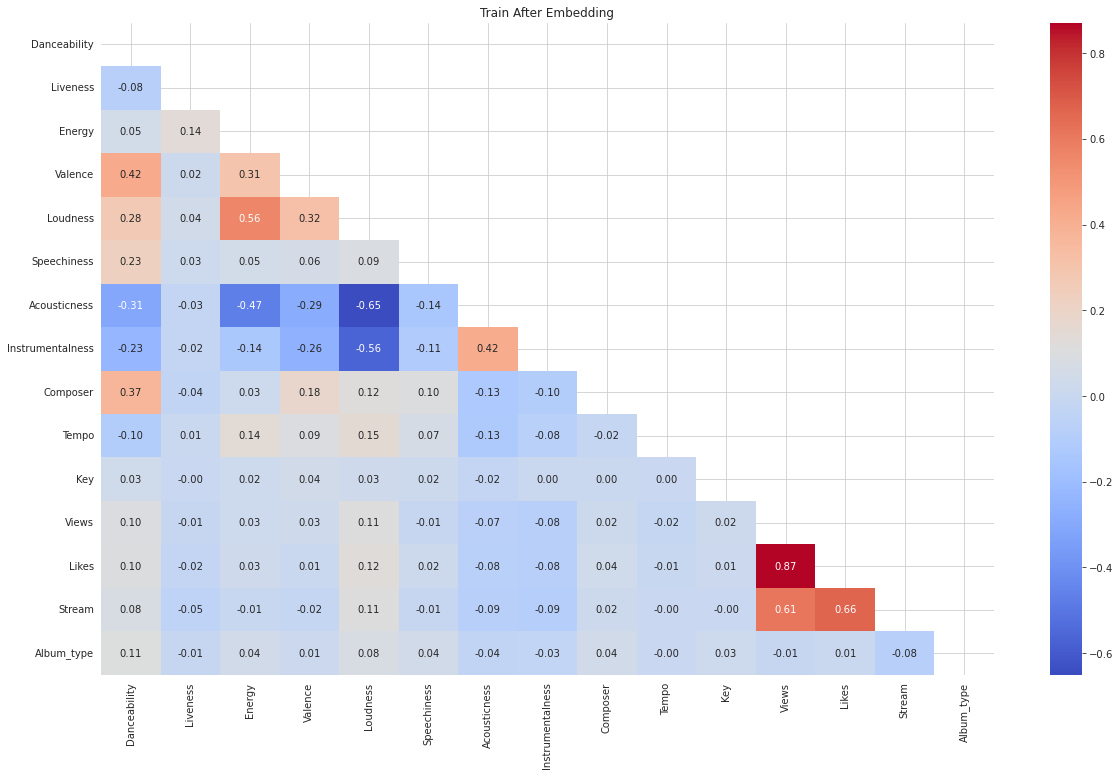

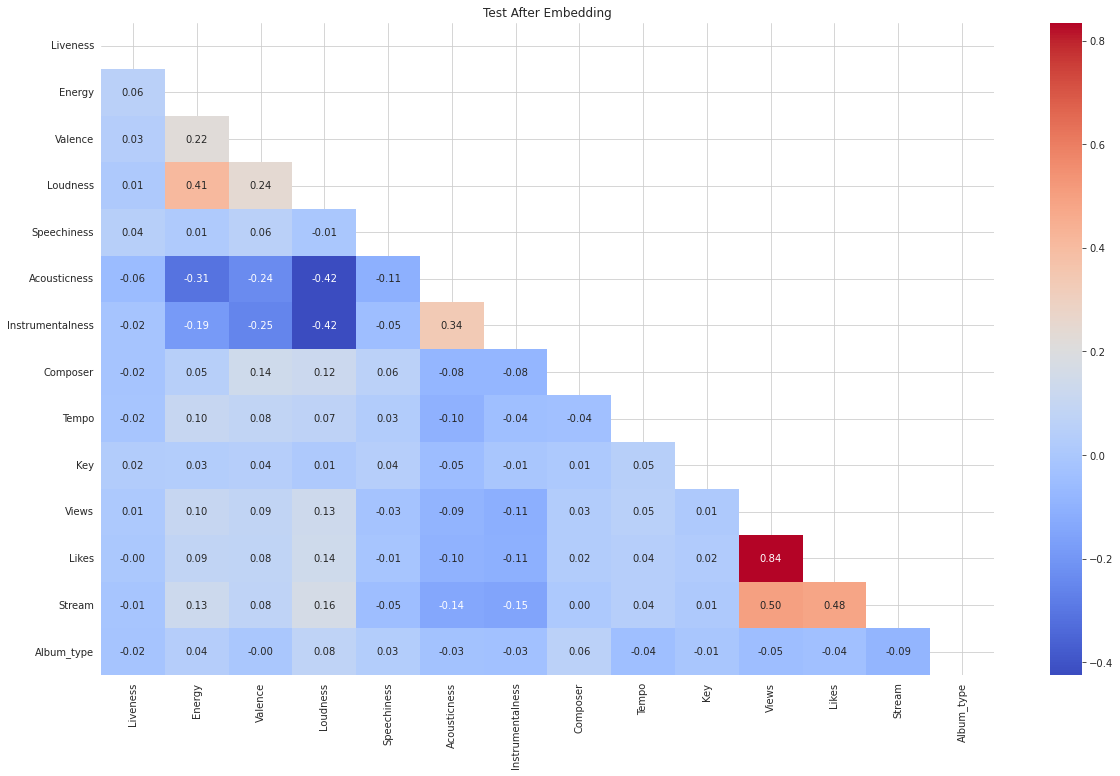

In [99]:
corr_matrix_with_threshold(df_train_embedding_important, 0, "Train After Embedding")
corr_matrix_with_threshold(df_test_embedding_important, 0, "Test After Embedding")

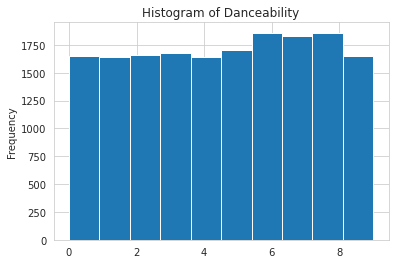

Min: 0.0 Max: 9.0


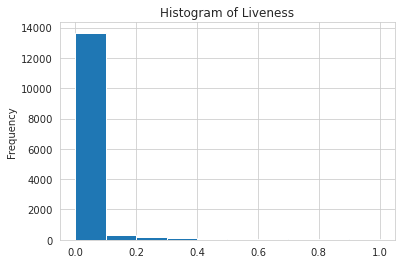

Min: 3.0486250000000004e-06 Max: 1.0


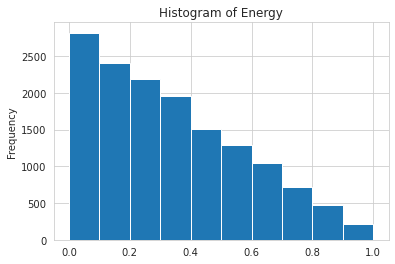

Min: 8.365426999999998e-15 Max: 1.0


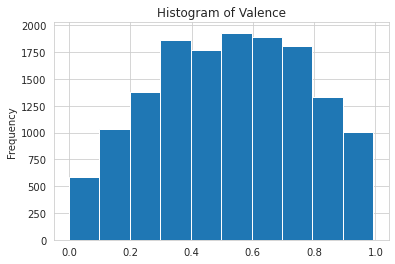

Min: 0.0 Max: 0.993


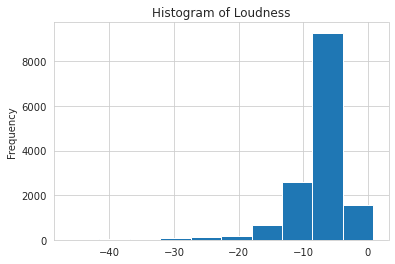

Min: -46.251 Max: 0.829


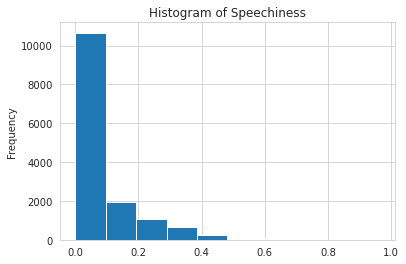

Min: 0.0 Max: 0.964


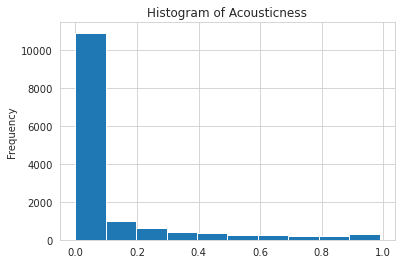

Min: 1.3676309999999998e-18 Max: 0.988047936


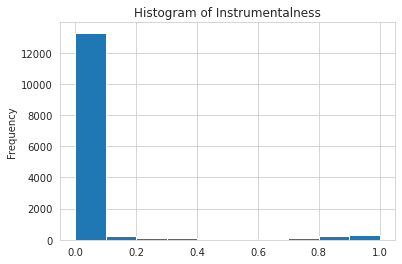

Min: 0.0 Max: 1.0


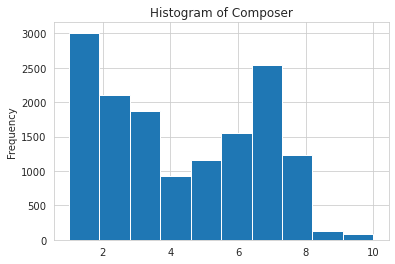

Min: 1.0 Max: 10.0


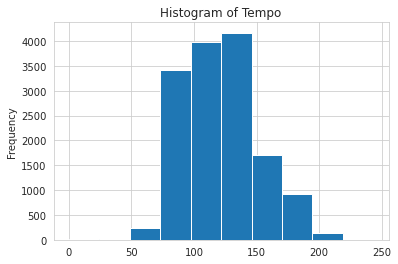

Min: 0.0 Max: 243.372


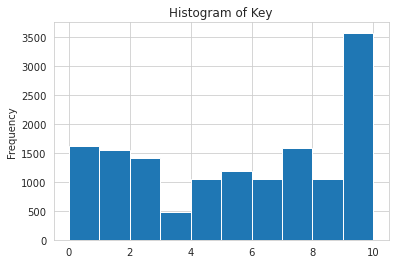

Min: 0.0 Max: 10.0


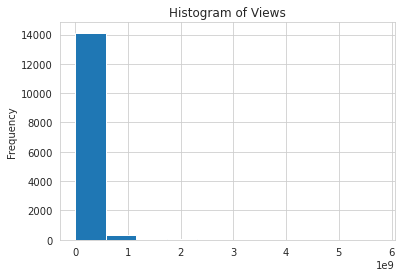

Min: 26.0 Max: 5773798407.0


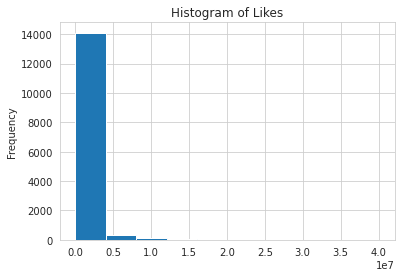

Min: 0.0 Max: 40147618.0


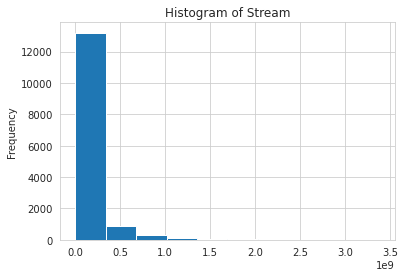

Min: 6574.0 Max: 3386520288.0


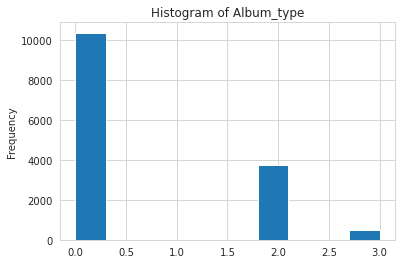

Min: 0.0 Max: 3.0


In [100]:
import matplotlib.pyplot as plt

for cols in df_train_embedding_important.columns:
        plot_hist(df_train_embedding_important, cols)



In [101]:
# plot_hist_with_min_max(df_train_embedding_important, 'Duration_ms', 0, 500000.0)

In [102]:
def convert_decibel_to_numerical(dB_value):
    return 10**(dB_value / 10)

def categorize_values(value, min_value, max_value, num_categories):
    if np.isnan(value):
        return np.nan
    segment_size = (max_value - min_value) / num_categories
    category = int((value - min_value) // segment_size) + 1
    if category < 1:
        return 0
    elif category > num_categories:
        return num_categories+1
    else:
        return category

def conditioning(df):
    df_tmp = df.copy()
    df_tmp['Loudness2'] = df_tmp['Loudness'].apply(lambda x: convert_decibel_to_numerical(x)) 
    df_tmp = df_tmp.drop(['Loudness'], axis=1)

#     val_max = np.max(df_tmp['Duration_ms'])
#     val_min = np.min(df_tmp['Duration_ms'])
#     df_tmp['Duration_ms2'] = df_tmp['Duration_ms'].apply(lambda x: categorize_values(x, val_min, val_max, 10))
#     df_tmp = df_tmp.drop(['Duration_ms'], axis=1)
    
#     val_max = np.max(df_tmp['Tempo'])
#     val_min = np.min(df_tmp['Tempo'])
#     df_tmp['Tempo2'] = df_tmp['Tempo'].apply(lambda x: categorize_values(x, val_min, val_max, 20))
#     df_tmp = df_tmp.drop(['Tempo'], axis=1)
    
    
    return df_tmp

In [103]:
df_train_embedding_important_non_danceability = df_train_embedding_important.iloc[:,1:]

df_all_to_conditioning = pd.concat([df_train_embedding_important_non_danceability, df_test_embedding_important])


df_all_to_conditioning_after_conditioning = conditioning(df_all_to_conditioning)
df_train_embedding_important_non_danceability_after_conditioning = df_all_to_conditioning_after_conditioning.iloc[:len(df_train_embedding_important),:]
df_test_embedding_important_non_danceability_after_conditioning = df_all_to_conditioning_after_conditioning.iloc[len(df_train_embedding_important):,:]


In [104]:
df_all_to_conditioning_after_conditioning.shape

(23485, 14)

In [105]:
# plot_hist(df_train_embedding_important_non_danceability_after_conditioning, 'Duration_ms2')
# plot_hist_with_min_max(df_train_embedding_important_non_danceability_after_conditioning, 'Duration_ms2',0,3)
# plot_hist(df_test_embedding_important_non_danceability_after_conditioning, 'Duration_ms2')

## Imputation

In [106]:
df_all_to_conditioning_after_conditioning

,Liveness,Energy,Valence,Speechiness,Acousticness,Instrumentalness,Composer,Tempo,Key,Views,Likes,Stream,Album_type,Loudness2
0,0.000807,0.000273,0.340000,0.044300,0.724151,0.000062,NaN,83.398000,3.0,NaN,1.376220e+05,1.998137e+07,0.0,0.003037
1,0.034966,0.184220,0.746000,NaN,0.672221,0.910000,1.0,148.692000,7.0,1.848250e+05,5.190000e+03,NaN,NaN,NaN
2,0.001772,NaN,0.380000,NaN,0.667628,0.867000,1.0,84.899000,6.0,1.848250e+05,5.190000e+03,1.932081e+07,NaN,0.027568
3,0.001000,0.209585,NaN,0.027700,0.003796,NaN,2.0,150.220000,NaN,2.024573e+08,9.970350e+05,3.996619e+08,0.0,0.237083
4,0.002924,NaN,0.295000,0.026000,0.000003,0.000467,3.0,97.997000,5.0,3.166880e+08,1.299086e+06,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6310,0.001642,0.160377,0.160253,0.045451,0.317692,0.006016,6.0,72.136829,7.0,9.636781e+06,5.807853e+04,1.750041e+07,0.0,0.230840
6311,0.008843,0.318585,0.614366,0.073000,0.007420,0.000817,7.0,NaN,10.0,4.572846e+07,7.227992e+04,1.365601e+07,2.0,0.384719
6312,0.000662,0.426223,0.087281,0.072906,0.661708,0.898308,4.0,87.969239,5.0,-3.451740e+06,2.305163e+04,1.849094e+07,2.0,0.262570
6313,0.030605,0.204440,0.482987,0.037676,0.003631,0.491785,7.0,NaN,NaN,1.728134e+07,NaN,1.199593e+08,0.0,0.069760


In [107]:
# we got around 5500 clean data without N/A
# it means that it got around 12000 non-clean data

df_with_clean_data = df_all_to_conditioning_after_conditioning.dropna()
print("Clean Data without NaN:", len(df_with_clean_data))
print("Data with NaN:", len(df_all_to_conditioning_after_conditioning) - len(df_with_clean_data))


Clean Data without NaN: 2403
Data with NaN: 21082


In [108]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import itertools
import time

def evaluate_MSE_is_imputation_for_target_column_with_KNN_is_the_correct_strategy(df, important_columns, target_column):
#     print("Target", target_column)
#     print("Supporting", important_columns)
    y = df[target_column]
    X = df.drop(target_column, axis=1)
    X = X[important_columns]
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = KNeighborsRegressor(n_neighbors=20)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)

#     print("Mean Squared Error:", mse, "Mean Absolute Error:", mae)
#     print("------------------------------")
    return mse, mae


arr_best_combination_imputation = {}
for target in df_with_clean_data.columns:
    start_time = time.time()
    
    non_target = df_with_clean_data.columns.drop([target])
    str_non_target = '_'.join(non_target)
    path_features = "cache_feature_combinations/features/" + target + "-" + str_non_target + ".csv"
    path_scores = "cache_feature_combinations/scores/" + target + "-" + str_non_target + ".csv"
    if os.path.exists(path_features):
        tmp_pd_feature = pd.read_csv(path_features)
        tmp_pd_score = pd.read_csv(path_scores)
        print("ALREADY CACHED")
        tmp_comb = np.array(tmp_pd_feature['combination'].values)
        tmp_min_mse, tmp_min_mae = tmp_pd_score['mse'], tmp_pd_score['mae']
        arr_best_combination_imputation[target] = {'combination': tmp_comb, 'mse': tmp_min_mse[0], 'mae': tmp_min_mae[0]}
    else:
        # Generate combinations
        combinations = []
        for r in range(1, len(non_target) + 1):
            combinations.extend(list(itertools.combinations(non_target, r)))

        # Print the combinations
        min_mae, min_mse = np.inf, np.inf
        best_combination = []
        print("For Target", target, "Number of Combinations", len(combinations))
        for combo in combinations:
            mse, mae = evaluate_MSE_is_imputation_for_target_column_with_KNN_is_the_correct_strategy(
                df_with_clean_data, 
                np.array(combo), 
                target
            )
            if min_mse > mse:
                min_mse = mse
                min_mae = mae
                best_combination = np.array(combo)

        arr_best_combination_imputation[target] = {'combination': best_combination, 'mse': min_mse, 'mae': min_mae}
        tmp_pd_feature = pd.DataFrame(best_combination, columns=['combination'])
        tmp_pd_score = pd.DataFrame([[min_mse,min_mae]], columns=['mse', 'mae'])
        tmp_pd_feature.to_csv(path_features)
        tmp_pd_score.to_csv(path_scores)
        print("NOT YET CACHED")
    end_time = time.time()
    execution_time = end_time - start_time
    print("Target:", target, "Exec:", execution_time)

arr_best_combination_imputation

ALREADY CACHED
Target: Liveness Exec: 0.003253459930419922
ALREADY CACHED
Target: Energy Exec: 0.0030486583709716797
ALREADY CACHED
Target: Valence Exec: 0.0023484230041503906
ALREADY CACHED
Target: Speechiness Exec: 0.002027750015258789
ALREADY CACHED
Target: Acousticness Exec: 0.001737833023071289
ALREADY CACHED
Target: Instrumentalness Exec: 0.001718759536743164
ALREADY CACHED
Target: Composer Exec: 0.0020246505737304688
ALREADY CACHED
Target: Tempo Exec: 0.002019166946411133
ALREADY CACHED
Target: Key Exec: 0.0018076896667480469
ALREADY CACHED
Target: Views Exec: 0.002354145050048828
ALREADY CACHED
Target: Likes Exec: 0.002223968505859375
ALREADY CACHED
Target: Stream Exec: 0.001730203628540039
ALREADY CACHED
Target: Album_type Exec: 0.0017390251159667969
ALREADY CACHED
Target: Loudness2 Exec: 0.001744985580444336


{'Liveness': {'combination': array(['Valence', 'Speechiness', 'Album_type'], dtype=object),
  'mse': 0.0071490320887365,
  'mae': 0.0394967669911397},
 'Energy': {'combination': array(['Liveness', 'Valence', 'Speechiness', 'Acousticness', 'Loudness2'],
        dtype=object),
  'mse': 0.0315529927852563,
  'mae': 0.1345568716550694},
 'Valence': {'combination': array(['Liveness', 'Energy', 'Composer', 'Loudness2'], dtype=object),
  'mse': 0.0540485730739364,
  'mae': 0.1940726152127595},
 'Speechiness': {'combination': array(['Energy', 'Valence', 'Key', 'Album_type', 'Loudness2'],
        dtype=object),
  'mse': 0.0094282885409963,
  'mae': 0.0680857536638059},
 'Acousticness': {'combination': array(['Energy', 'Loudness2'], dtype=object),
  'mse': 0.0322840995654145,
  'mae': 0.1145280685682763},
 'Instrumentalness': {'combination': array(['Valence', 'Speechiness', 'Album_type', 'Loudness2'], dtype=object),
  'mse': 0.0253144078592788,
  'mae': 0.0833597525487148},
 'Composer': {'combin

In [109]:
from sklearn.impute import KNNImputer
import pandas as pd

def imputer(df, arr_best_combination_imputation):
    df_new = pd.DataFrame()
    for col in df.columns:
        combination = np.append(arr_best_combination_imputation[col]['combination'], col)
        print(col, ":", combination)
        imputer = KNNImputer(n_neighbors=20)
        df_combination = df[combination]
        imputed_data = imputer.fit_transform(df_combination)
        imputed_df = pd.DataFrame(imputed_data, columns=df_combination.columns)
#         print(imputed_df)
        objective_df = imputed_df[col]
#         print(objective_df)
        df_new = pd.concat([df_new, objective_df], axis=1)
    
    return df_new

df_all_after_conditioning_after_imputer_before_reverse_conditioning = imputer(df_all_to_conditioning_after_conditioning, arr_best_combination_imputation)    



Liveness : ['Valence' 'Speechiness' 'Album_type' 'Liveness']
Energy : ['Liveness' 'Valence' 'Speechiness' 'Acousticness' 'Loudness2' 'Energy']
Valence : ['Liveness' 'Energy' 'Composer' 'Loudness2' 'Valence']
Speechiness : ['Energy' 'Valence' 'Key' 'Album_type' 'Loudness2' 'Speechiness']
Acousticness : ['Energy' 'Loudness2' 'Acousticness']
Instrumentalness : ['Valence' 'Speechiness' 'Album_type' 'Loudness2' 'Instrumentalness']
Composer : ['Liveness' 'Energy' 'Valence' 'Speechiness' 'Album_type' 'Composer']
Tempo : ['Energy' 'Instrumentalness' 'Tempo']
Key : ['Liveness' 'Valence' 'Speechiness' 'Composer' 'Album_type' 'Key']
Views : ['Instrumentalness' 'Likes' 'Views']
Likes : ['Views' 'Stream' 'Likes']
Stream : ['Liveness' 'Likes' 'Stream']
Album_type : ['Liveness' 'Speechiness' 'Album_type']
Loudness2 : ['Energy' 'Speechiness' 'Acousticness' 'Instrumentalness' 'Loudness2']


In [110]:
import math

def convert_to_decibel(value):
    if value == 0:
        return float('-inf')
    else:
        return 10 * math.log10(value)


def reverse_conditioning(df):
    df_tmp = df.copy()
    df_tmp['Loudness3'] = df_tmp['Loudness2'].apply(convert_to_decibel)
    df_tmp = df_tmp.drop(['Loudness2'], axis=1)
    
    df_tmp['Composer2'] = df_tmp['Composer'].apply(np.rint)
    df_tmp = df_tmp.drop(['Composer'], axis=1)

    df_tmp['Album_type2'] = df_tmp['Album_type'].apply(np.rint)
    df_tmp = df_tmp.drop(['Album_type'], axis=1)
    
    df_tmp['Key2'] = df_tmp['Key'].apply(np.rint)
    df_tmp = df_tmp.drop(['Key'], axis=1)

#     df_tmp['Channel2'] = df_tmp['Channel'].apply(np.rint)
#     df_tmp = df_tmp.drop(['Channel'], axis=1)
    
    return df_tmp

df_all_after_conditioning_after_imputer = reverse_conditioning(df_all_after_conditioning_after_imputer_before_reverse_conditioning)
df_all_after_conditioning_after_imputer

,Liveness,Energy,Valence,Speechiness,Acousticness,Instrumentalness,Tempo,Views,Likes,Stream,Loudness3,Composer2,Album_type2,Key2
0,0.000807,0.000273,0.340000,0.044300,0.724151,0.000062,83.398000,7.467058e+07,1.376220e+05,1.998137e+07,-25.176000,3.0,0.0,3.0
1,0.034966,0.184220,0.746000,0.114579,0.672221,0.910000,148.692000,1.848250e+05,5.190000e+03,1.252401e+08,-6.537735,1.0,0.0,7.0
2,0.001772,0.184182,0.380000,0.141949,0.667628,0.867000,84.899000,1.848250e+05,5.190000e+03,1.932081e+07,-15.596000,1.0,1.0,6.0
3,0.001000,0.209585,0.567447,0.027700,0.003796,0.048511,150.220000,2.024573e+08,9.970350e+05,3.996619e+08,-6.251000,2.0,0.0,5.0
4,0.002924,0.538417,0.295000,0.026000,0.000003,0.000467,97.997000,3.166880e+08,1.299086e+06,1.013754e+08,-5.391332,3.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23480,0.001642,0.160377,0.160253,0.045451,0.317692,0.006016,72.136829,9.636781e+06,5.807853e+04,1.750041e+07,-6.366894,6.0,0.0,7.0
23481,0.008843,0.318585,0.614366,0.073000,0.007420,0.000817,116.842370,4.572846e+07,7.227992e+04,1.365601e+07,-4.148566,7.0,2.0,10.0
23482,0.000662,0.426223,0.087281,0.072906,0.661708,0.898308,87.969239,-3.451740e+06,2.305163e+04,1.849094e+07,-5.807545,4.0,2.0,5.0
23483,0.030605,0.204440,0.482987,0.037676,0.003631,0.491785,108.593697,1.728134e+07,2.709420e+05,1.199593e+08,-11.563964,7.0,0.0,4.0


In [111]:
df_all_after_conditioning_after_imputer.tail(40)

,Liveness,Energy,Valence,Speechiness,Acousticness,Instrumentalness,Tempo,Views,Likes,Stream,Loudness3,Composer2,Album_type2,Key2
23445,0.000166,0.212901,0.462739,0.045309,1.575146e-01,0.000375,119.226262,2.290037e+08,3.239568e+06,2.734233e+08,-10.732140,7.0,2.0,4.0
23446,0.000926,0.161189,0.632684,0.059495,3.194519e-02,0.838149,110.965000,4.105046e+06,5.136301e+04,5.237302e+06,-6.083937,7.0,0.0,7.0
23447,0.004854,0.161565,0.470792,0.050776,4.929548e-03,0.070043,150.764501,1.418868e+08,-1.397831e+04,1.446433e+07,-8.585606,4.0,0.0,4.0
23448,0.027082,0.194888,0.822637,0.245588,5.998883e-01,0.949300,102.355568,-2.171841e+06,1.400536e+05,3.896246e+07,-7.413825,2.0,0.0,7.0
23449,0.016633,0.254168,0.807836,0.090808,4.322065e-02,0.147094,92.394582,6.207310e+06,2.648840e+04,6.134229e+07,-5.160108,3.0,2.0,5.0
23450,0.001745,0.493111,0.249127,0.053620,3.618013e-02,0.001154,109.642203,9.611860e+06,6.240512e+04,2.845998e+08,-5.777907,7.0,0.0,1.0
23451,0.002201,0.568161,0.492326,0.068873,3.668816e-06,0.000241,85.579561,9.753759e+07,2.205418e+05,3.237864e+08,-7.031688,7.0,1.0,3.0
23452,0.005703,0.275681,0.617728,0.059889,4.931307e-01,0.106762,103.024788,-2.823565e+05,1.486005e+04,-4.771092e+06,-10.160840,2.0,0.0,0.0
23453,0.019600,0.449574,0.467684,0.298015,1.459324e-04,0.000888,94.854225,1.515277e+08,-3.231971e+04,4.860693e+07,-4.812163,3.0,1.0,1.0
23454,0.000365,0.148816,0.461591,0.097552,5.057166e-01,0.152314,83.488100,3.548238e+06,-2.260207e+03,1.262194e+08,-11.486565,2.0,0.0,7.0


In [112]:
obj_columns = df_all_to_conditioning_after_conditioning.select_dtypes(include=['object']).columns
# print(int_columns)
# convert integer columns to float
df_all_to_conditioning_after_conditioning[obj_columns] = df_all_to_conditioning_after_conditioning[obj_columns].astype(np.float64)

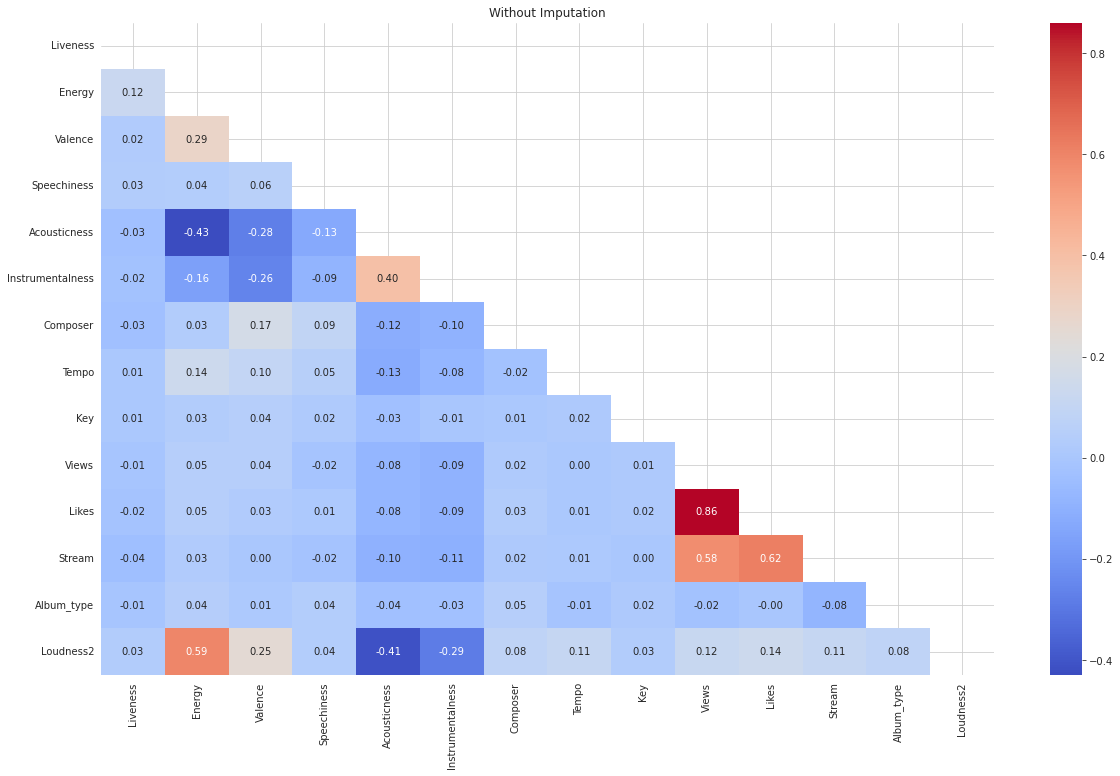

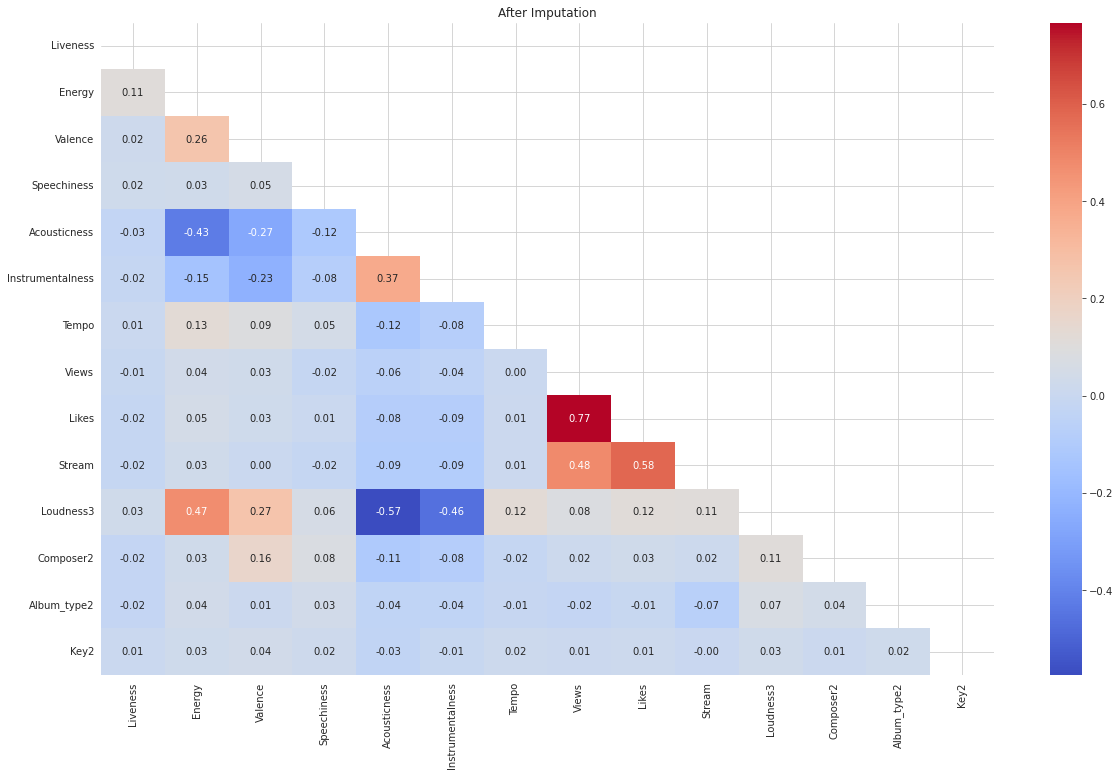

In [113]:


corr_matrix_with_threshold(df_all_to_conditioning_after_conditioning, 0.0, 'Without Imputation')
corr_matrix_with_threshold(df_all_after_conditioning_after_imputer, 0.0, 'After Imputation')



In [114]:
df_train_from_all_after_conditioning_no_label = df_all_after_conditioning_after_imputer.iloc[:len(df_train),:]
df_train_from_all_after_conditioning_with_label = pd.concat([df_train.iloc[:,:1], df_train_from_all_after_conditioning_no_label], axis=1)
df_test_from_all_after_conditioning = df_all_after_conditioning_after_imputer.iloc[len(df_train):,:]

index_validation = df_test_partial_answer['id'].values
df_val_from_all_after_conditioning_using_index_validation = df_all_after_conditioning_after_imputer.iloc[index_validation,:]

print(len(df_all_after_conditioning_after_imputer))
print(len(df_train))
print(len(df_validation))
print(len(df_val_from_all_after_conditioning_using_index_validation))

label_danceability_validation = df_test_partial_answer['Danceability'].values
label_danceability_validation

23485
17170
631
631


array([9, 9, 8, 8, 8, 8, 4, 1, 6, 1, 0, 2, 0, 6, 5, 5, 5, 4, 1, 4, 4, 1,
       3, 3, 4, 3, 5, 2, 2, 1, 2, 6, 2, 2, 0, 4, 7, 3, 7, 2, 1, 0, 4, 6,
       9, 4, 2, 0, 2, 1, 1, 0, 0, 3, 5, 4, 9, 1, 3, 7, 1, 1, 1, 7, 4, 5,
       1, 7, 8, 0, 7, 1, 6, 5, 7, 2, 6, 8, 8, 0, 2, 1, 7, 8, 1, 9, 3, 5,
       5, 7, 9, 3, 4, 6, 0, 8, 4, 9, 0, 5, 7, 1, 4, 2, 0, 0, 7, 4, 2, 7,
       7, 5, 1, 5, 4, 6, 4, 9, 6, 9, 3, 0, 3, 6, 1, 7, 7, 9, 0, 3, 3, 2,
       4, 5, 0, 1, 6, 5, 5, 6, 0, 3, 2, 2, 4, 9, 1, 1, 1, 2, 0, 6, 6, 9,
       0, 8, 4, 7, 4, 4, 0, 3, 6, 3, 1, 1, 1, 2, 9, 4, 3, 4, 7, 2, 3, 7,
       9, 7, 3, 3, 6, 4, 4, 7, 0, 5, 6, 3, 6, 4, 7, 2, 4, 7, 4, 3, 2, 9,
       1, 3, 2, 5, 0, 3, 3, 1, 7, 6, 3, 8, 5, 4, 0, 3, 6, 2, 0, 0, 3, 2,
       9, 2, 7, 5, 9, 5, 4, 5, 5, 4, 7, 2, 6, 3, 9, 5, 8, 5, 3, 0, 3, 2,
       7, 9, 2, 1, 1, 5, 3, 9, 2, 1, 6, 6, 9, 7, 7, 3, 1, 9, 7, 9, 3, 9,
       3, 9, 4, 8, 1, 5, 5, 9, 7, 2, 8, 8, 4, 5, 2, 2, 9, 9, 1, 3, 9, 5,
       4, 6, 1, 9, 8, 9, 5, 4, 6, 0, 5, 7, 3, 7, 2,

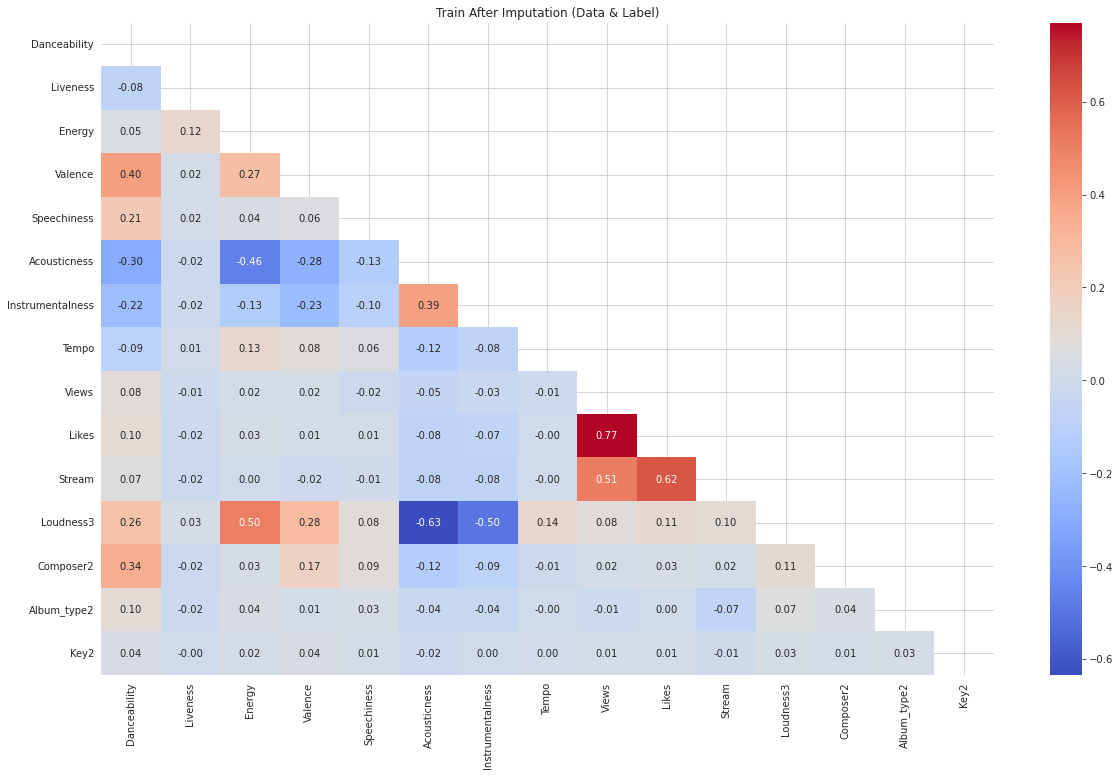

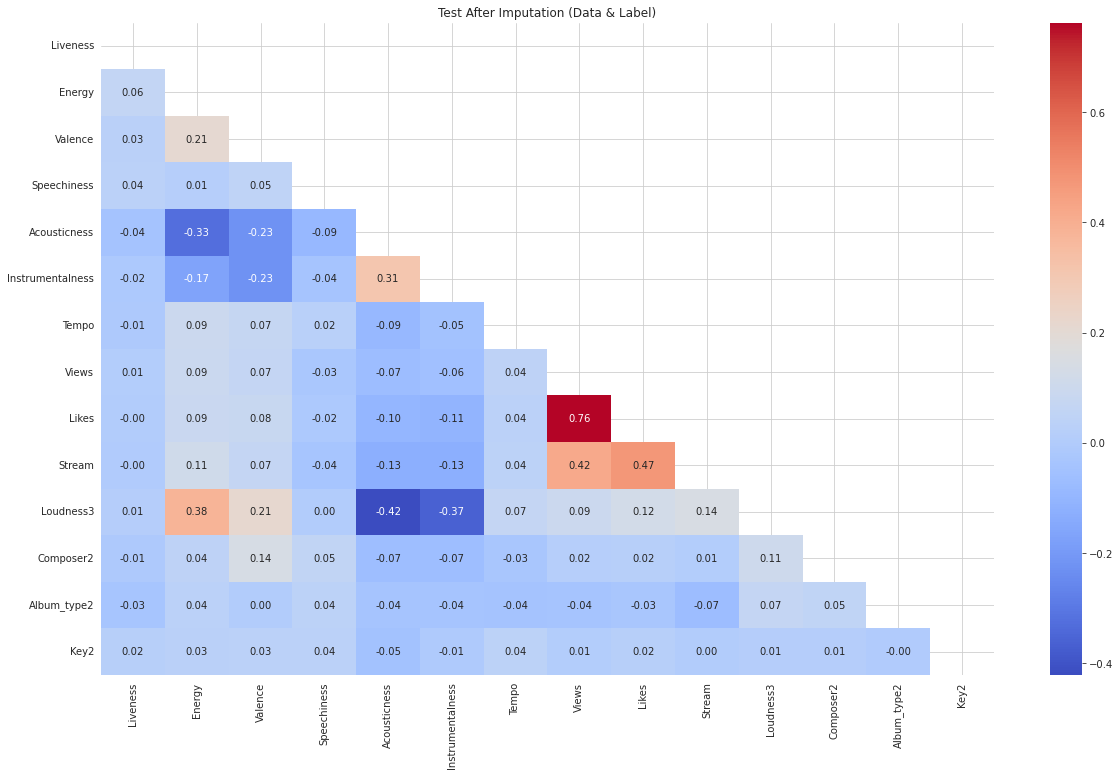

In [115]:
corr_matrix_with_threshold(df_train_from_all_after_conditioning_with_label, 0.0, 'Train After Imputation (Data & Label)')

corr_matrix_with_threshold(df_test_from_all_after_conditioning, 0.0, 'Test After Imputation (Data & Label)')



In [116]:
df_train_from_all_after_conditioning_with_label.shape

(17170, 15)

In [117]:
df_test_from_all_after_conditioning.shape

(6315, 14)

In [118]:
df_all_final = pd.concat([df_train_from_all_after_conditioning_with_label, df_test_from_all_after_conditioning], axis=0)
df_all_final
# arr_index_label_partial_answer = df_test_partial_answer['id'].values
# arr_value_label_partial_answer = df_test_partial_answer['Danceability'].values
# i = 0
# for idx in arr_index_label_partial_answer:
#     df_all_final.loc[idx,'Danceability'] = arr_value_label_partial_answer[i]
#     i +=1
    
# df_validation = df_all_final.loc[arr_index_label_partial_answer]    

# print(df_validation.loc[23484])
# df_validation.tail(5)

,Danceability,Liveness,Energy,Valence,Speechiness,Acousticness,Instrumentalness,Tempo,Views,Likes,Stream,Loudness3,Composer2,Album_type2,Key2
0,0.0,0.000807,0.000273,0.340000,0.044300,0.724151,0.000062,83.398000,7.467058e+07,1.376220e+05,1.998137e+07,-25.176000,3.0,0.0,3.0
1,0.0,0.034966,0.184220,0.746000,0.114579,0.672221,0.910000,148.692000,1.848250e+05,5.190000e+03,1.252401e+08,-6.537735,1.0,0.0,7.0
2,0.0,0.001772,0.184182,0.380000,0.141949,0.667628,0.867000,84.899000,1.848250e+05,5.190000e+03,1.932081e+07,-15.596000,1.0,1.0,6.0
3,1.0,0.001000,0.209585,0.567447,0.027700,0.003796,0.048511,150.220000,2.024573e+08,9.970350e+05,3.996619e+08,-6.251000,2.0,0.0,5.0
4,4.0,0.002924,0.538417,0.295000,0.026000,0.000003,0.000467,97.997000,3.166880e+08,1.299086e+06,1.013754e+08,-5.391332,3.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23480,NaN,0.001642,0.160377,0.160253,0.045451,0.317692,0.006016,72.136829,9.636781e+06,5.807853e+04,1.750041e+07,-6.366894,6.0,0.0,7.0
23481,NaN,0.008843,0.318585,0.614366,0.073000,0.007420,0.000817,116.842370,4.572846e+07,7.227992e+04,1.365601e+07,-4.148566,7.0,2.0,10.0
23482,NaN,0.000662,0.426223,0.087281,0.072906,0.661708,0.898308,87.969239,-3.451740e+06,2.305163e+04,1.849094e+07,-5.807545,4.0,2.0,5.0
23483,NaN,0.030605,0.204440,0.482987,0.037676,0.003631,0.491785,108.593697,1.728134e+07,2.709420e+05,1.199593e+08,-11.563964,7.0,0.0,4.0


In [119]:
train_features = df_train_from_all_after_conditioning_with_label.iloc[:,1:]
train_labels   = df_train_from_all_after_conditioning_with_label.iloc[:,:1]
val_features   = df_val_from_all_after_conditioning_using_index_validation
val_labels     = label_danceability_validation

In [120]:
train_features

,Liveness,Energy,Valence,Speechiness,Acousticness,Instrumentalness,Tempo,Views,Likes,Stream,Loudness3,Composer2,Album_type2,Key2
0,0.000807,0.000273,0.340000,0.044300,7.241508e-01,0.000062,83.398,7.467058e+07,1.376220e+05,1.998137e+07,-25.176000,3.0,0.0,3.0
1,0.034966,0.184220,0.746000,0.114579,6.722214e-01,0.910000,148.692,1.848250e+05,5.190000e+03,1.252401e+08,-6.537735,1.0,0.0,7.0
2,0.001772,0.184182,0.380000,0.141949,6.676276e-01,0.867000,84.899,1.848250e+05,5.190000e+03,1.932081e+07,-15.596000,1.0,1.0,6.0
3,0.001000,0.209585,0.567447,0.027700,3.796416e-03,0.048511,150.220,2.024573e+08,9.970350e+05,3.996619e+08,-6.251000,2.0,0.0,5.0
4,0.002924,0.538417,0.295000,0.026000,3.048625e-06,0.000467,97.997,3.166880e+08,1.299086e+06,1.013754e+08,-5.391332,3.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17165,0.000591,0.794023,0.658000,0.032800,8.991539e-02,0.000000,90.002,6.691884e+07,1.113000e+03,8.225019e+07,-6.344000,1.0,0.0,5.0
17166,0.000786,0.820026,0.657000,0.132541,2.195200e-05,0.000000,174.869,1.647410e+05,2.019000e+03,1.089818e+07,-1.786000,3.0,2.0,4.0
17167,0.003652,0.571787,0.419000,0.064700,2.925072e-02,0.000000,168.388,3.564600e+04,3.290000e+02,8.771859e+07,-4.679000,4.0,2.0,4.0
17168,0.001260,0.451218,0.539000,0.419000,4.511802e-02,0.004114,155.378,6.533000e+03,1.727795e+03,6.873961e+06,-5.829107,1.0,2.0,9.0


In [121]:
train_labels

,Danceability
0,0
1,0
2,0
3,1
4,4
...,...
17165,3
17166,2
17167,1
17168,1


In [122]:
val_features

,Liveness,Energy,Valence,Speechiness,Acousticness,Instrumentalness,Tempo,Views,Likes,Stream,Loudness3,Composer2,Album_type2,Key2
18871,0.000634,0.611960,0.646007,0.093891,0.004574,0.000193,121.002000,1.488170e+08,9.370610e+05,1.112196e+08,-7.402412,5.0,0.0,5.0
18872,0.021265,0.320245,0.962000,0.091200,0.016777,0.001590,121.002000,1.488170e+08,1.095508e+06,1.304275e+08,-7.201210,5.0,0.0,3.0
18873,0.066923,0.148036,0.491044,0.280000,0.000007,0.079261,99.439000,4.140185e+06,2.317769e+05,4.495917e+07,-10.117000,5.0,0.0,6.0
18879,0.003049,0.167284,0.391000,0.101000,0.043987,0.000000,115.011500,8.687921e+07,7.036050e+05,1.986931e+07,-6.106548,2.0,2.0,10.0
18882,0.000625,0.098611,0.450000,0.040300,0.440711,0.000000,125.900000,3.363790e+05,9.175000e+03,9.368100e+05,-7.576000,7.0,0.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23462,0.001309,0.307725,0.770259,0.033415,0.066262,0.013672,95.871722,2.393215e+06,4.887013e+04,1.292995e+08,-2.533880,1.0,0.0,7.0
23463,0.001355,0.269900,0.466107,0.104984,0.006946,0.001588,103.858359,1.175475e+08,3.806590e+05,6.228127e+07,-11.299350,5.0,2.0,0.0
23473,0.000114,0.480568,0.287141,0.092398,0.153384,0.001714,91.755727,7.459512e+06,8.290086e+02,3.013345e+06,-3.828332,1.0,0.0,8.0
23482,0.000662,0.426223,0.087281,0.072906,0.661708,0.898308,87.969239,-3.451740e+06,2.305163e+04,1.849094e+07,-5.807545,4.0,2.0,5.0


In [123]:
val_labels

array([9, 9, 8, 8, 8, 8, 4, 1, 6, 1, 0, 2, 0, 6, 5, 5, 5, 4, 1, 4, 4, 1,
       3, 3, 4, 3, 5, 2, 2, 1, 2, 6, 2, 2, 0, 4, 7, 3, 7, 2, 1, 0, 4, 6,
       9, 4, 2, 0, 2, 1, 1, 0, 0, 3, 5, 4, 9, 1, 3, 7, 1, 1, 1, 7, 4, 5,
       1, 7, 8, 0, 7, 1, 6, 5, 7, 2, 6, 8, 8, 0, 2, 1, 7, 8, 1, 9, 3, 5,
       5, 7, 9, 3, 4, 6, 0, 8, 4, 9, 0, 5, 7, 1, 4, 2, 0, 0, 7, 4, 2, 7,
       7, 5, 1, 5, 4, 6, 4, 9, 6, 9, 3, 0, 3, 6, 1, 7, 7, 9, 0, 3, 3, 2,
       4, 5, 0, 1, 6, 5, 5, 6, 0, 3, 2, 2, 4, 9, 1, 1, 1, 2, 0, 6, 6, 9,
       0, 8, 4, 7, 4, 4, 0, 3, 6, 3, 1, 1, 1, 2, 9, 4, 3, 4, 7, 2, 3, 7,
       9, 7, 3, 3, 6, 4, 4, 7, 0, 5, 6, 3, 6, 4, 7, 2, 4, 7, 4, 3, 2, 9,
       1, 3, 2, 5, 0, 3, 3, 1, 7, 6, 3, 8, 5, 4, 0, 3, 6, 2, 0, 0, 3, 2,
       9, 2, 7, 5, 9, 5, 4, 5, 5, 4, 7, 2, 6, 3, 9, 5, 8, 5, 3, 0, 3, 2,
       7, 9, 2, 1, 1, 5, 3, 9, 2, 1, 6, 6, 9, 7, 7, 3, 1, 9, 7, 9, 3, 9,
       3, 9, 4, 8, 1, 5, 5, 9, 7, 2, 8, 8, 4, 5, 2, 2, 9, 9, 1, 3, 9, 5,
       4, 6, 1, 9, 8, 9, 5, 4, 6, 0, 5, 7, 3, 7, 2,

# All Data

# Try Sofi's Ensemble  (Cascade Level 1)
## Main Feature: Loudness, Speechiness, Acousticness, Instrumentalness, Valence, Composer

In [124]:
class LGBWrapper:
    def __init__(self, params=None, num_boost_round=10):
        self.params = params
        self.num_boost_round = num_boost_round
        self.model = None

    def fit(self, X, y):
        lgb_train = lgb.Dataset(X, y, free_raw_data=False)
        self.model = lgb.train(self.params, lgb_train, num_boost_round=self.num_boost_round)

    def predict(self, X):
        return self.model.predict(X)


In [125]:
# Prepare LightGBM parameters
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'mae',
    'learning_rate': 0.05,
    'num_leaves': 31,
    'verbose': -1
}

# For XGBRegressor parameters
default_params = {
    'objective': 'reg:squarederror',
    'booster': 'gbtree',
    'n_estimators': 100,
    'learning_rate': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,
    'subsample': 1,
    'colsample_bytree': 1,
    'gamma': 0,
    'reg_alpha': 0,
    'reg_lambda': 1,
    'random_state': 0,
    'n_jobs': -1
}


In [144]:
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.multiclass import OneVsOneClassifier
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn import svm

import pickle
regressors = [
    DecisionTreeClassifier(max_depth=None),
#     ExtraTreesClassifier(),
    LGBWrapper(params, num_boost_round=200),
    RandomForestRegressor(n_estimators=1000, random_state=42),
    RandomForestRegressor(n_estimators=2000, random_state=42),
    XGBRegressor(**default_params),
    OneVsOneClassifier(AdaBoostClassifier(random_state=42), n_jobs=8),
#     OneVsOneClassifier(ExtraTreesClassifier(), n_jobs=8),
#     OneVsOneClassifier(XGBRegressor(**default_params), n_jobs=8),
#     OneVsOneClassifier(svm.SVC(kernel='linear'), n_jobs=8),    
#     ExtraTreesClassifier(),
#     svm.SVC(kernel='rbf'),
]
# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['regressors', 'mae', 'accuracy'])
all_preds = []

# Train and evaluate each classifier
for reg in regressors:
    print("Processing Regressor:", reg.__class__.__name__)
    reg.fit(train_features, np.ravel(train_labels))
    pred = reg.predict(val_features)
    all_preds.append(pred)
    accuracy = accuracy_score(np.ravel(val_labels), np.rint(pred))
    mae = mean_absolute_error(np.ravel(val_labels), np.rint(pred))
    pd_tmp = pd.DataFrame({'regressors':[reg.__class__.__name__], 'mae': [mae], 'accuracy': [accuracy]})
    result_table = pd.concat([result_table, pd_tmp])

result_table.set_index('regressors', inplace=True)
result_table.sort_values(by=['mae'], ascending=True)

result_table


Processing Regressor: DecisionTreeClassifier
Processing Regressor: LGBWrapper
Processing Regressor: RandomForestRegressor
Processing Regressor: RandomForestRegressor
Processing Regressor: XGBRegressor
Processing Regressor: OneVsOneClassifier


,mae,accuracy
regressors,,
DecisionTreeClassifier,2.894531,0.120444
LGBWrapper,2.120444,0.136292
RandomForestRegressor,2.150555,0.129952
RandomForestRegressor,2.136292,0.131537
XGBRegressor,2.166403,0.129952
OneVsOneClassifier,2.574219,0.150555


In [147]:
median_preds = np.median(all_preds, axis=0)
median_accuracy = accuracy_score(np.ravel(val_labels), np.rint(median_preds))

median_mae = mean_absolute_error(np.ravel(val_labels), np.rint(median_preds))

print("Median Accuracy:", median_accuracy)
print("Median MAE:", median_mae)
print("Median Accuracy:", accuracy_score(np.ravel(val_labels), np.rint(median_preds)))

Median Accuracy: 0.12361331220285261
Median MAE: 2.1473851030110933
Median Accuracy: 0.12361331220285261


In [146]:
print("Mean Accuracy", np.mean(result_table['accuracy']), "Error", (1-np.mean(result_table['accuracy'])), "MAE", np.mean(result_table['mae']), "Error x MAE", (1-np.mean(result_table['accuracy'])) * np.mean(result_table['mae']))

Mean Accuracy 0.13312202852614896 Error 0.866877971473851 MAE 2.340407099033624 Error x MAE 2.0288473584332682


In [129]:
print("Mean Accuracy", np.mean(result_table['accuracy']), "Error", (1-np.mean(result_table['accuracy'])), "MAE", np.mean(result_table['mae']), "Error x MAE", (1-np.mean(result_table['accuracy'])) * np.mean(result_table['mae']))

Mean Accuracy 0.1336502905441099 Error 0.8663497094558901 MAE 2.3348732448669574 Error x MAE 2.0228167573068196


In [148]:

# print()
# print(val_labels)
tmp_lbl = pd.DataFrame(val_labels, columns=['Danceability'])

all_val = pd.concat([tmp_lbl, val_features.reset_index(drop=True)], axis=1)
# print(all_val)

df_train_for_regressor =  pd.concat([df_train_from_all_after_conditioning_with_label, all_val]).reset_index(drop=True).sample(frac=1, random_state=420) 
df_train_for_regressor

,Danceability,Liveness,Energy,Valence,Speechiness,Acousticness,Instrumentalness,Tempo,Views,Likes,Stream,Loudness3,Composer2,Album_type2,Key2
15431,8,0.395447,0.234885,0.489574,0.073396,1.442897e-03,0.000000,149.96200,6.603181e+07,1216983.0,369544416.0,-9.320000,6.0,0.0,5.0
16729,5,0.001260,0.257259,0.438000,0.077100,1.924883e-02,0.130498,127.02100,5.466840e+05,6937.0,39342584.0,-7.431000,3.0,0.0,10.0
6914,6,0.015195,0.393833,0.497000,0.139000,5.367465e-02,0.000000,118.96345,7.622607e+07,553972.0,71755419.0,-5.126000,6.0,1.0,1.0
14500,5,0.002000,0.849278,0.653000,0.055300,5.493533e-07,0.000164,125.97800,9.802320e+05,14131.0,87834866.0,-3.755000,6.0,2.0,5.0
1028,3,0.368602,0.340068,0.531000,0.094205,2.940796e-01,0.000000,96.97300,2.608180e+05,3152.0,7945190.0,-7.224000,3.0,1.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,8,0.047046,0.408518,0.717000,0.039600,1.931006e-04,0.000482,111.98100,1.078387e+08,1502.0,14981017.0,-6.366000,7.0,2.0,0.0
10394,1,0.000601,0.232608,0.155000,0.032500,3.944312e-06,0.000389,77.93500,2.938908e+07,293532.0,258478149.0,-6.217000,3.0,0.0,3.0
1209,9,0.001030,0.377933,0.550000,0.171000,8.385618e-07,0.081800,90.96100,8.711980e+05,15732.0,20600682.0,-8.789000,3.0,1.0,2.0
14254,5,0.033073,0.450943,0.294000,0.283000,5.443994e-05,0.100489,145.04600,5.338394e+07,414183.0,72642185.0,-5.497000,6.0,0.0,0.0


In [150]:

# train on the full training set
for reg in regressors:
    print("Processing Regressor:", reg.__class__.__name__)
    reg.fit(
        df_train_for_regressor.iloc[:, 1:],                # Full X data
        np.ravel(df_train_for_regressor.iloc[:, :1])       # Full Y label
    )

Processing Regressor: DecisionTreeClassifier
Processing Regressor: LGBWrapper
Processing Regressor: RandomForestRegressor


In [132]:
def ensemble_predict(regressors, X):
    # Initialize an empty array of predictions
    predictions = np.zeros((X.shape[0], len(regressors)))

    # Generate predictions for each regressor
    for i, reg in enumerate(regressors):
        predictions[:, i] = reg.predict(X)

    # Average the predictions
    avg_predictions = predictions.mean(axis=1)
    median_predictions = np.median(predictions, axis=1)

    #return avg_predictions, predictions
    return median_predictions, predictions

# Make ensemble predictions to Validations
ensemble_predictions_l1, all_predictions = ensemble_predict(regressors, val_features)
accuracy = accuracy_score(np.ravel(val_labels), np.rint(ensemble_predictions_l1))
mae = mean_absolute_error(np.ravel(val_labels), np.rint(ensemble_predictions_l1))

print("Acc", accuracy, "Error", (1- accuracy), "MAE", mae, "Error x MAE", (1-accuracy) * mae)

Acc 0.24722662440570523 Error 0.7527733755942948 MAE 1.2282091917591125 Error x MAE 0.9245631792164476


In [134]:
df_train_for_regressor

,Danceability,Liveness,Energy,Valence,Speechiness,Acousticness,Instrumentalness,Tempo,Views,Likes,Stream,Loudness3,Composer2,Album_type2,Key2
15431,8,0.395447,0.234885,0.489574,0.073396,1.442897e-03,0.000000,149.96200,6.603181e+07,1216983.0,369544416.0,-9.320000,6.0,0.0,5.0
16729,5,0.001260,0.257259,0.438000,0.077100,1.924883e-02,0.130498,127.02100,5.466840e+05,6937.0,39342584.0,-7.431000,3.0,0.0,10.0
6914,6,0.015195,0.393833,0.497000,0.139000,5.367465e-02,0.000000,118.96345,7.622607e+07,553972.0,71755419.0,-5.126000,6.0,1.0,1.0
14500,5,0.002000,0.849278,0.653000,0.055300,5.493533e-07,0.000164,125.97800,9.802320e+05,14131.0,87834866.0,-3.755000,6.0,2.0,5.0
1028,3,0.368602,0.340068,0.531000,0.094205,2.940796e-01,0.000000,96.97300,2.608180e+05,3152.0,7945190.0,-7.224000,3.0,1.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,8,0.047046,0.408518,0.717000,0.039600,1.931006e-04,0.000482,111.98100,1.078387e+08,1502.0,14981017.0,-6.366000,7.0,2.0,0.0
10394,1,0.000601,0.232608,0.155000,0.032500,3.944312e-06,0.000389,77.93500,2.938908e+07,293532.0,258478149.0,-6.217000,3.0,0.0,3.0
1209,9,0.001030,0.377933,0.550000,0.171000,8.385618e-07,0.081800,90.96100,8.711980e+05,15732.0,20600682.0,-8.789000,3.0,1.0,2.0
14254,5,0.033073,0.450943,0.294000,0.283000,5.443994e-05,0.100489,145.04600,5.338394e+07,414183.0,72642185.0,-5.497000,6.0,0.0,0.0


In [135]:
df_test_from_all_after_conditioning

,Liveness,Energy,Valence,Speechiness,Acousticness,Instrumentalness,Tempo,Views,Likes,Stream,Loudness3,Composer2,Album_type2,Key2
17170,0.230346,0.350403,0.530306,0.177000,5.842771e-07,0.002330,138.559000,6.935552e+08,6.220896e+06,1.040235e+09,-6.679000,3.0,0.0,6.0
17171,0.000099,0.347429,0.852000,0.030200,4.245906e-02,0.000687,92.761000,7.201164e+07,5.851081e+05,3.100837e+08,-5.815000,1.0,1.0,8.0
17172,0.001561,0.786330,0.551000,0.052200,7.676563e-05,0.032389,108.014000,8.435055e+06,2.821420e+05,6.306347e+07,-3.930000,1.0,2.0,1.0
17173,0.000262,0.403583,0.578000,0.026000,3.442951e-15,0.509000,120.423000,3.367590e+08,1.788577e+06,4.346636e+08,-5.810000,5.0,0.0,2.0
17174,0.000340,0.334255,0.525000,0.171000,1.619428e-05,0.000000,167.953000,6.184810e+08,6.197318e+06,6.172597e+08,-8.627000,2.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23480,0.001642,0.160377,0.160253,0.045451,3.176921e-01,0.006016,72.136829,9.636781e+06,5.807853e+04,1.750041e+07,-6.366894,6.0,0.0,7.0
23481,0.008843,0.318585,0.614366,0.073000,7.419596e-03,0.000817,116.842370,4.572846e+07,7.227992e+04,1.365601e+07,-4.148566,7.0,2.0,10.0
23482,0.000662,0.426223,0.087281,0.072906,6.617082e-01,0.898308,87.969239,-3.451740e+06,2.305163e+04,1.849094e+07,-5.807545,4.0,2.0,5.0
23483,0.030605,0.204440,0.482987,0.037676,3.630868e-03,0.491785,108.593697,1.728134e+07,2.709420e+05,1.199593e+08,-11.563964,7.0,0.0,4.0


In [136]:
# Make ensemble predictions to Real TEST
ensemble_predictions_real, all_predictions = ensemble_predict(regressors, df_test_from_all_after_conditioning)


In [137]:
import datetime

current_datetime = datetime.datetime.now()
datetime_string = current_datetime.strftime("%Y%m%d_%H%M")

predictionsTest = ensemble_predictions_real
preds = np.rint(predictionsTest)
preds = preds.astype(int)
preds = pd.DataFrame(preds, columns=['Danceability'])
preds['id'] = preds.index + 17170
preds = preds[['id', 'Danceability']]
preds[preds['id']==18871]


,id,Danceability
1701,18871,7


In [138]:
df_test_partial_answer

,id,Danceability
0,18871,9
1,18872,9
2,18873,8
3,18879,8
4,18882,8
...,...,...
626,23462,4
627,23463,7
628,23473,5
629,23482,3


In [139]:
# Correcting the 631 data from partial answer
for d in range(len(df_test_partial_answer.index)):
    val_id = df_test_partial_answer.loc[d, 'id']
    val_dance = df_test_partial_answer.loc[d, 'Danceability']
    preds.loc[preds['id'] == val_id, 'Danceability'] = val_dance    

In [140]:
preds[preds['id']==18871]

,id,Danceability
1701,18871,9


In [141]:
preds.to_csv('L1_cascade_' + datetime_string + '.csv', index=False)
np.rint(predictionsTest)

array([6., 5., 5., ..., 3., 5., 5.])